In [85]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pylab as plt
from common.functions import *

In [86]:
# MSE(Mean Squared Error)
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [87]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [88]:
# CEE(Cross Entropy Error)
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [89]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [90]:
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [91]:
print(X_train.shape)

(60000, 784)


In [92]:
print(X_test.shape)

(10000, 784)


In [93]:
# minibatch size 10, random choice
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

In [94]:
np.random.choice(train_size, batch_size)

array([ 9709, 48932,  9616, 36518, 12363, 46188, 12049,  8088,  1679,
       46635])

In [ ]:
#def cross_entropy_error(y, t):
#    if y.ndim == 1:
#        t = t.reshape(1, t.size)
#        y = y.reshape(1, y.size)
#        
#    batch_size = y.shape[0]
#    return -np.sum(t*np.log())

In [130]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [97]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

In [98]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

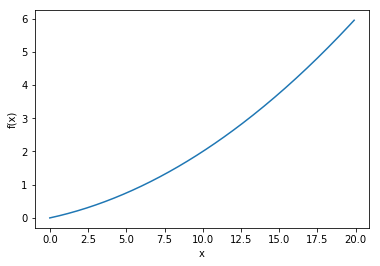

In [99]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [100]:
numerical_diff(function_1, 5)

0.1999999999990898

In [101]:
numerical_dif(function_1, 10)

NameError: name 'numerical_dif' is not defined

In [102]:
def function_2(x):
    return np.sum(x**2) # or return x[0]**2 + x[1]**2 

In [103]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [104]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [105]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [106]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [107]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad


In [108]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [109]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [110]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [111]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [112]:
init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [113]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [114]:
net = simpleNet()
print(net.W)

[[ 1.26043879e+00  2.56292196e-01 -2.70182404e-01]
 [-1.13370845e+00  2.53981380e-03  2.66204181e+00]]


In [115]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.26407433  0.15606115  2.23372819]


In [116]:
np.argmax(p) # 최대값의 인덱스

2

In [117]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

7.6388975600289095

In [118]:
def f(W):
    return net.loss(x, t)

In [119]:
dW = numerical_gradient(f, net.W)
print(dW)

[[-1.07736682 -0.41333173  1.49069855]
 [-1.61605023 -0.6199976   2.23604783]]


In [133]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return  y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
            
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [136]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# hyper parameter
iters_num = 10000 # interate num
train_size = x_train.shape[0]
batch_size = 100 # mini batch size
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # get mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # calculate gradient
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # updata parameter
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # Record train progress
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [137]:
train_loss_list

[2.294670995669584,
 2.2939784518373356,
 2.275984474882529,
 2.2950693680032224,
 2.2714083673979193,
 2.305289469948913,
 2.2824848235079913,
 2.308658422814168,
 2.289774186271946,
 2.291711337936973,
 2.2862849741602687,
 2.2796609292062966,
 2.2862791835402025,
 2.285475885687771,
 2.301428611558028,
 2.269631808006825,
 2.290246283554448,
 2.292661833132514,
 2.305474544724655,
 2.2735541668236987,
 2.3040399812109142,
 2.2984735957911253,
 2.287248001381914,
 2.2945959720151956,
 2.2946003919005515,
 2.2860909944738115,
 2.3006048781702626,
 2.2806564119757833,
 2.28424913483253,
 2.30435582510569,
 2.2787854285299347,
 2.279777256622986,
 2.28891745753227,
 2.293719852814004,
 2.2831475722079038,
 2.272643283985849,
 2.2917151040175825,
 2.277212085079249,
 2.29882559315961,
 2.297073014095561,
 2.2839018564717883,
 2.3027203329523913,
 2.287811386925867,
 2.286668338677895,
 2.2745353475643015,
 2.3058201240484975,
 2.304768286757148,
 2.2927986151497377,
 2.2916633037670344,


In [143]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# hyper parameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100 # mini batch size
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# iterate number per one epoch
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : " + str(train_acc) + ", " + str(test_acc))

train acc, test acc : 0.11236666666666667, 0.1135
train acc, test acc : 0.7894666666666666, 0.7906
train acc, test acc : 0.8781333333333333, 0.8829
train acc, test acc : 0.8992166666666667, 0.9034
train acc, test acc : 0.9073166666666667, 0.9091
train acc, test acc : 0.913, 0.916
train acc, test acc : 0.9184833333333333, 0.9203
train acc, test acc : 0.9218333333333333, 0.9237
train acc, test acc : 0.9260333333333334, 0.9276
train acc, test acc : 0.9300833333333334, 0.9305
train acc, test acc : 0.9320166666666667, 0.9328
train acc, test acc : 0.9343666666666667, 0.9337
train acc, test acc : 0.9359, 0.9359
train acc, test acc : 0.9389666666666666, 0.9364
train acc, test acc : 0.94145, 0.9396
train acc, test acc : 0.9425166666666667, 0.9407
train acc, test acc : 0.9441666666666667, 0.9427
